In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import explore_copy1 as e
import wrangle as w
import explore as s

In [2]:
df, train, val, test = w.wrangle_data()

Opening data from local file.


In [3]:
df_clus = w.k_means_clustering(4)

Opening data from local file.
Cluster 1 Mean:
customer_age                       28.105851
sub_category_Bike Stands            0.001808
sub_category_Bottles and Cages      0.254438
sub_category_Caps                   0.076677
sub_category_Cleaners               0.024737
sub_category_Fenders                0.019888
sub_category_Gloves                 0.012410
sub_category_Helmets                0.048159
sub_category_Hydration Packs        0.004356
sub_category_Jerseys                0.024901
sub_category_Mountain Bikes         0.003698
sub_category_Road Bikes             0.001890
sub_category_Shorts                 0.005999
sub_category_Socks                  0.017751
sub_category_Tires and Tubes        0.499178
sub_category_Touring Bikes          0.000247
sub_category_Vests                  0.002794
revenue                           179.097304
dtype: float64

Cluster 2 Mean:
customer_age                       48.486637
sub_category_Bike Stands            0.003155
sub_category_Bottles a

In [4]:
train_clus, val_clus, test_clus = w.clean_split_df(df_clus)

In [5]:
train_clus.head()

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,unit_price,cost,revenue,profit,clusters
31768,2015-12-25,2015,December,22,F,United States,California,Accessories,Tires and Tubes,1,175.0,191.0,175.0,191.0,16.0,0
15069,2016-02-24,2016,February,42,F,France,Yveline,Bikes,Road Bikes,2,850.5,1037.5,1701.0,2075.0,374.0,3
26187,2016-03-08,2016,March,31,M,France,Seine (Paris),Accessories,Helmets,2,192.5,160.5,385.0,321.0,-64.0,2
13139,2016-02-18,2016,February,28,M,United States,California,Clothing,Caps,2,67.5,97.0,135.0,194.0,59.0,0
16041,2015-08-01,2015,August,21,F,United States,California,Accessories,Bottles and Cages,1,10.0,12.0,10.0,12.0,2.0,0


In [6]:
df.loc[26187]

date                              2016-03-08 00:00:00
year                                             2016
month                                           March
customer_age                                       31
customer_gender                                     M
country                                        France
state                                   Seine (Paris)
product_category                          Accessories
sub_category                                  Helmets
quantity                                            2
unit_cost                                       192.5
unit_price                                      160.5
cost                                            385.0
revenue                                         321.0
profit                                          -64.0
sub_category_Bike Stands                            0
sub_category_Bottles and Cages                      0
sub_category_Caps                                   0
sub_category_Cleaners       

In [7]:
# Extract necessary variables for plotting
label = train_clus['clusters']

### Question 1

In [8]:
# e.plot_mean_revenue(train_clus, label)

In [9]:
def show_plot_1(train_clus):
    """
    Plot the mean revenue for each cluster.

    Parameters:
        train_clus (pandas.DataFrame): DataFrame with the clustered data.
        label (numpy.array): Cluster labels.

    Returns:
        None
    """
    # create barplot
    sns.barplot(x=train_clus['clusters'], y=train_clus['revenue'], estimator=np.mean)
    # add axis labels
    plt.xlabel('Cluster', size = 16)
    plt.ylabel('Mean Revenue (Dollars)', size=16)
    # add title
    plt.title('Customers in Cluster 3 Produce\nThe Highest Revenue', size=17)
    # resize ticks
    plt.xticks(size=13)
    plt.yticks(size=13)
    # display plot
    plt.show()

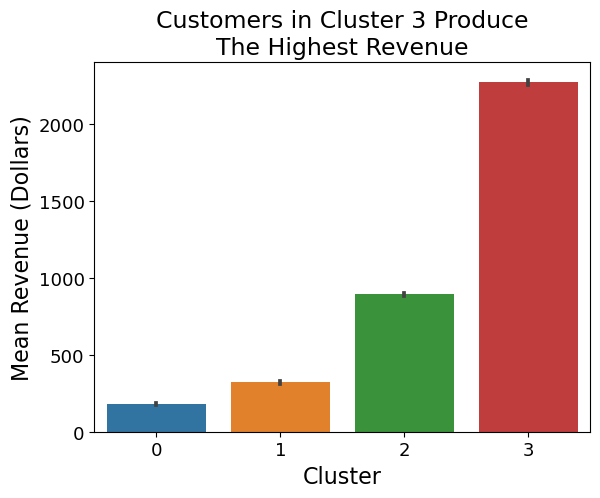

In [10]:
show_plot_1(train_clus)

In [11]:
train_clus[train_clus['clusters'] == 0].revenue.mean()

179.4459935427062

In [12]:
def get_avg_cluster_revenue(train_clus):
    print(f'cluster 0 average revenue is: \
{round(train_clus[train_clus.clusters == 0].revenue.mean(),2)}')
    print(f'cluster 1 average revenue is: \
{round(train_clus[train_clus.clusters == 1].revenue.mean(),2)}')
    print(f'cluster 2 average revenue is: \
{round(train_clus[train_clus.clusters == 2].revenue.mean(),2)}')
    print(f'cluster 3 average revenue is: \
{round(train_clus[train_clus.clusters == 3].revenue.mean(),2)}')

In [13]:
get_avg_cluster_revenue(train_clus)

cluster 0 average revenue is: 179.45
cluster 1 average revenue is: 321.25
cluster 2 average revenue is: 894.45
cluster 3 average revenue is: 2274.29


### question 2

In [14]:
# e.ages_by_cluster(label, train_clus['customer_age'])

In [15]:
def show_plot_2(train_clus):
    """
    Create a bar plot to compare cluster ages.

    Parameters:
        train_clus (pandas.Series): clustered training dataset.

    Returns:
        None
    """
    # create barplot of mean age by cluster
    sns.barplot(x=train_clus['clusters'], 
                y=train_clus['customer_age'], 
                estimator=np.mean)
    # add axis labels
    plt.xlabel('Cluster', size=17)
    plt.ylabel('Mean Age of Customers', size=17)
    # add titles
    plt.title('Customers in Cluster 1 Have The\n Highest Average Age', size=18)
    # change tick size
    plt.xticks(size=13)
    plt.yticks(size=13)
    # display plot
    plt.show()

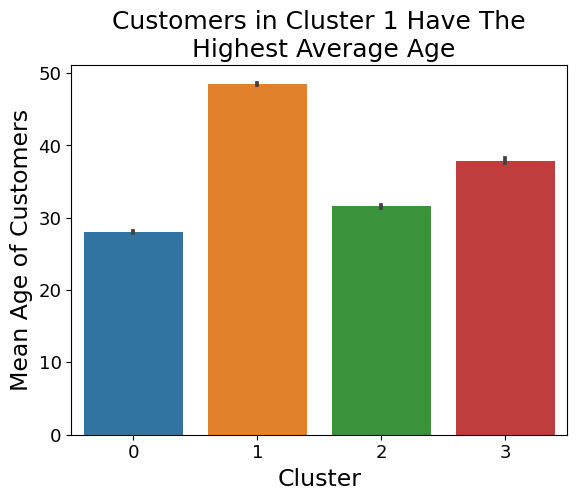

In [16]:
show_plot_2(train_clus)

In [17]:
def get_avg_cluster_age(train_clus):
    print(f'cluster 0 average customer_age is: \
{round(train_clus[train_clus.clusters == 0].customer_age.mean(),1)}')
    print(f'cluster 1 average customer_age is: \
{round(train_clus[train_clus.clusters == 1].customer_age.mean(),1)}')
    print(f'cluster 2 average customer_age is: \
{round(train_clus[train_clus.clusters == 2].customer_age.mean(),1)}')
    print(f'cluster 3 average customer_age is: \
{round(train_clus[train_clus.clusters == 3].customer_age.mean(),1)}')

In [18]:
get_avg_cluster_age(train_clus)

cluster 0 average customer_age is: 28.1
cluster 1 average customer_age is: 48.5
cluster 2 average customer_age is: 31.6
cluster 3 average customer_age is: 37.9


### Question 3

In [19]:
# e.visualize_subcategory_age(train_clus)

In [20]:
s.get_test_3(train_clus)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.01044170
test stat value: 31.85551356


In [21]:
train_clus.groupby('sub_category').median().sort_values('customer_age')

,year,customer_age,quantity,unit_cost,unit_price,cost,revenue,profit,clusters
sub_category,,,,,,,,,
Socks,2016.0,34.0,2.0,67.500,78.000,144.0,164.0,17.0,0.0
Road Bikes,2015.0,34.0,2.0,560.000,594.000,1120.0,1096.0,4.0,2.0
Jerseys,2016.0,34.0,2.0,360.000,415.000,750.0,854.0,95.0,2.0
Tires and Tubes,2016.0,35.0,2.0,52.500,65.000,96.0,114.0,17.0,0.0
Caps,2016.0,35.0,2.0,69.000,81.500,144.0,165.0,22.0,0.0
Mountain Bikes,2015.0,35.0,2.0,773.330,908.335,2295.0,2132.5,16.0,3.0
Helmets,2016.0,35.0,2.0,262.500,322.000,525.0,646.0,91.0,2.0
Touring Bikes,2016.0,35.0,2.0,794.670,880.165,2384.0,2124.0,39.5,3.0
Hydration Packs,2016.0,36.0,2.0,440.000,522.670,880.0,1130.0,143.0,2.0


In [22]:
meds = train_clus.groupby('sub_category').median().\
    sort_values('customer_age', ascending=False).index.to_list()

In [23]:
meds

['Bike Racks',
 'Shorts',
 'Cleaners',
 'Gloves',
 'Bike Stands',
 'Hydration Packs',
 'Fenders',
 'Bottles and Cages',
 'Vests',
 'Helmets',
 'Caps',
 'Mountain Bikes',
 'Tires and Tubes',
 'Touring Bikes',
 'Jerseys',
 'Road Bikes',
 'Socks']

In [24]:
def show_plot_3(train_clus):
    """
    Create a visualization of sub-categories

    Parameters:
        train_clus (pandas.DataFrame): Input DataFrame.

    Returns:
        None
    """
    # sort the median customer_age for each sub_category
    meds = train_clus.groupby('sub_category').median().\
        sort_values('customer_age', ascending=False).index.to_list()
    # set figure size
    plt.figure(figsize=(10, 6))
    # create a boxplot
    sns.boxplot(x=train_clus['sub_category'], 
                y=train_clus['customer_age'], 
                order=meds)
    # change axis labels
    plt.xlabel('Sub-Category', size=16)
    plt.ylabel('Age', size=16)
    # set tick size
    plt.xticks(rotation=90, size=13)
    plt.yticks(size=13)
    # add title
    plt.title('Age Is Fairly Evenly Distribute Across Sub-Categories', size=18)
    # display plot
    plt.show()

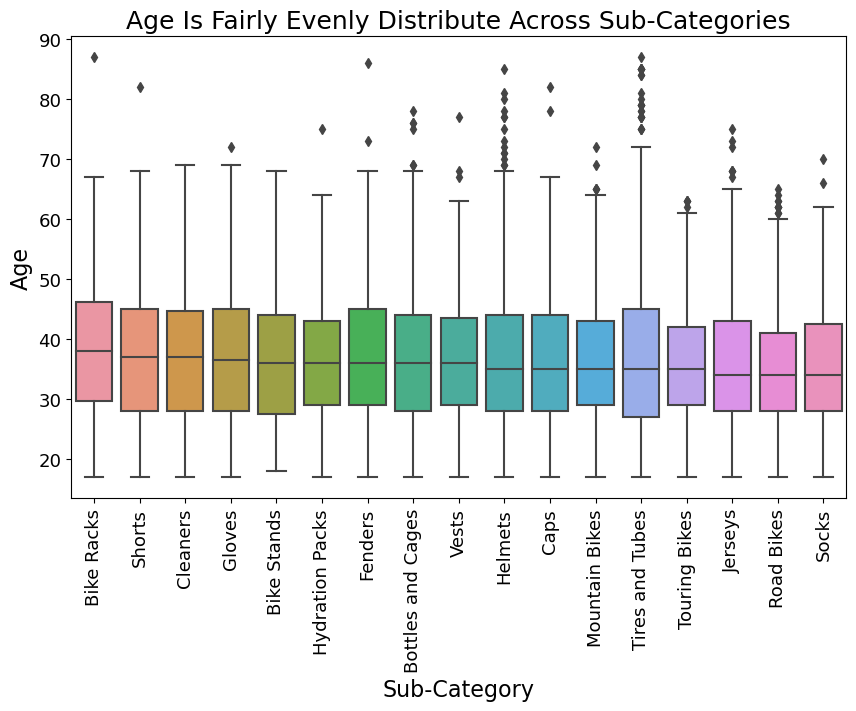

In [25]:
show_plot_3(train_clus)

#### the difference in age by sub_category is slight, but there does seem to be one

It would be nice to get this sorted

### question 4- Is there a relationship between gender and sub category purchased?

In [26]:
def show_plot_4(train_clus):
    """
    Create a visualization of sub-categories by gender.

    Parameters:
        train_clus (pandas.DataFrame): Input DataFrame.

    Returns:
        None
    """
    # group by sub-category and gender
    subcategory_gender = train_clus.groupby(
        ['sub_category', 'customer_gender']).size().unstack()
    # create plot
    subcategory_gender.plot(kind='bar', stacked=False)
    # add axis labels
    plt.xlabel('Sub-Category', size=16)
    plt.ylabel('Count', size=16)
    # add title
    plt.title('Sub-Category is Evenly Distributed by Gender', size=17)
    # show legend
    plt.legend(title='Gender')
    # display plot
    plt.show()

In [27]:
s.get_test_4(train)

========== ACCEPT THE NULL HYPOTHESIS! ==========
P-Value: 0.43900708


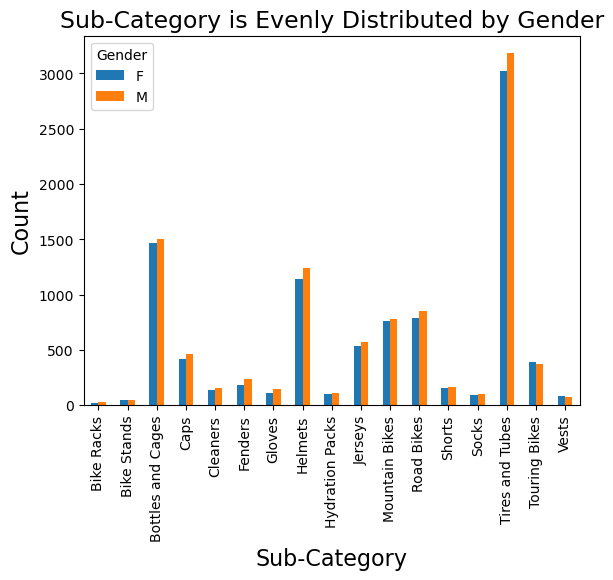

In [28]:
show_plot_4(train_clus)

### Question 5 - Is there a difference between purchases of the 3 types of bikes (mountain, road, touring) by age?

In [29]:
# e.visualize_subcategory_age(train_clus)

In [30]:
s.get_test_5(train_clus)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00007305
test stat value: 9.54729572


In [31]:
def show_plot_5(df):
    """
    Create a visualization of sub-categories: 
    Mountain Bikes, Road Bikes, and Touring Bikes by age.

    Parameters:
        df (pandas.DataFrame): Input DataFrame.

    Returns:
        None
    """
    # get a subset of the data containing only bike purchases
    subcategory_age = df[df['sub_category'].\
                         isin(['Mountain Bikes', 'Road Bikes', 'Touring Bikes'])]
    # sort the median customer_age for each sub_category
    meds = subcategory_age.groupby('sub_category').median().\
        sort_values('customer_age', ascending=False).index.to_list()
    # create boxplot
    sns.boxplot(x=subcategory_age['sub_category'], 
                y=subcategory_age['customer_age'],
                order=meds)
    # set axis labels
    plt.xlabel('Bike Type Purchased', size=16)
    plt.ylabel('Age of Customer', size=16)
    # create title
    plt.title('There is a Slight Difference In Age\n Distribution by Bike Type Purchased',
             size=17)
    # change tick size
    plt.xticks(size=13)
    plt.yticks(size=13)
    # display the plot
    plt.show()

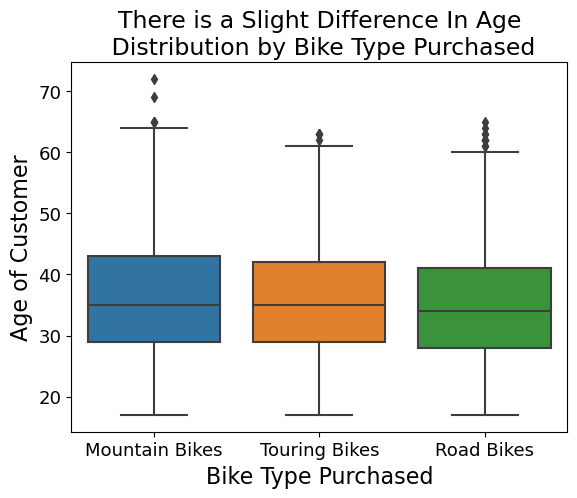

In [32]:
show_plot_5(train_clus)

### Question 6 - Is there a difference between purchases of the 3 types of bikes (mountain, road, touring) by gender?

In [33]:
# e.visualize_subcategory_gender(train_clus)

In [34]:
s.get_test_6(train)

========== ACCEPT THE NULL HYPOTHESIS! ==========
P-Value: 0.36811559


In [35]:
def show_plot_6(df):
    """
    Create a visualization of sub-categories: Mountain Bikes, Road Bikes, and Touring Bikes by gender.

    Parameters:
        df (pandas.DataFrame): Input DataFrame.

    Returns:
        None
    """
    # get a subset of the data containing only bike purchases
    subcategory_gender = df[df['sub_category'].\
                            isin(['Mountain Bikes', 'Road Bikes', 'Touring Bikes'])]
    # groupby category and gender
    subcategory_gender = subcategory_gender.\
        groupby(['sub_category', 'customer_gender']).size().unstack()
    # create a plot
    subcategory_gender.plot(kind='bar', stacked=False)
    # change axis labels
    plt.xlabel('Type of Bike Purchased', size=16)
    plt.ylabel('Purchase Count', size=16)
    # add title
    plt.title('Type of Bike Purchased is\n Evenly Distributed By Gender', size=17)
    # show legend
    plt.legend(title='Gender')
    # change tick size
    plt.xticks(rotation=45, size=13)
    plt.yticks(size=13)
    # display the plot
    plt.show()

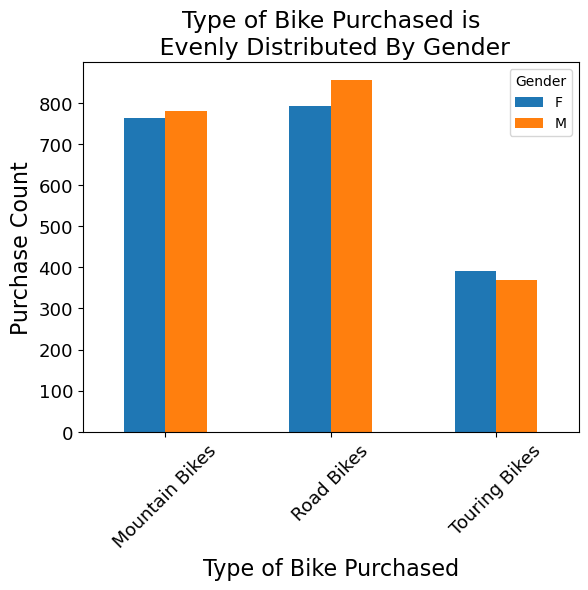

In [36]:
show_plot_6(train_clus)

### Question 7 - Is there a difference between purchases of the 3 types of bikes (mountain, road, touring) by location?

In [37]:
# e.visualize_subcategory_location(train_clus)

In [38]:
s.get_test_7(train_clus)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000163
test stat value: 37.17485133


In [39]:
def show_plot_7(df):
    """
    Create a visualization of sub-categories: Mountain Bikes, Road Bikes, and Touring Bikes by location.

    Parameters:
        df (pandas.DataFrame): Input DataFrame.

    Returns:
        None
    """
    # create subgroup with only bike purchases
    subcategory_location = df[df['sub_category'].\
                              isin(['Mountain Bikes', 'Road Bikes', 'Touring Bikes'])]
    # group data by sub_category and country
    subcategory_location = subcategory_location.\
        groupby(['sub_category', 'country']).size().unstack()
    # create barplot
    subcategory_location.plot(kind='bar', stacked=False)
    # add axis labels
    plt.xlabel('Type of Bike Purchased', size=16)
    plt.ylabel('Purchase Count', size=16)
    # add title
    plt.title('There Were More Bikes Purchased In\n United States Than Other Countries',
             size=17)
    # show legend
    plt.legend(title='Country')
    # change tick size
    plt.xticks(rotation=45, size=13)
    plt.yticks(size=13)
    # display the plot
    plt.show()

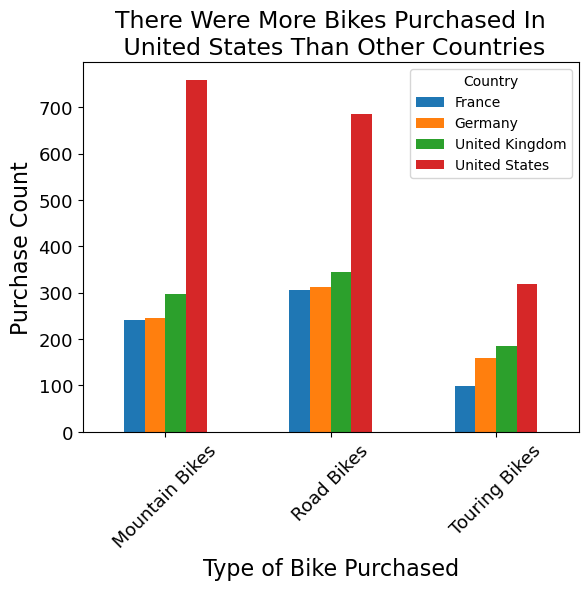

In [40]:
show_plot_7(train_clus)

### Question 8 - Is the proportion of transactions higher in one country relative to national population?

In [41]:
def show_plot_8(train_clus):
    # create a list of the country total populations as of 2023
    pop_totals = [65_690_000, 83_310_000, 67_620_000, 334_230_000]
    # create a dataframe of orders by country
    purchase_prop = pd.DataFrame(train_clus.groupby('country').
             date.count()).rename(columns={'date':'orders'}).reset_index()
    # create a column with the total populations
    purchase_prop = pd.concat([purchase_prop, pd.Series(pop_totals)], axis=1).\
                    rename(columns={0:'population'})
    # create a column with the proportion of orders to population
    purchase_prop['proportion'] = purchase_prop.orders / purchase_prop.population
    # sort the values by proportion
    purchase_prop = purchase_prop.sort_values('proportion', ascending=False)
    
    # create the plot
    sns.barplot(x=purchase_prop.country, y=purchase_prop.proportion)
    # add title
    plt.title('United Kingdom Has The Highest Purchase Rate\n\
    Relative to Total Country Population', size=17)
    # add axis labels
    plt.xlabel('Country', size=16)
    plt.ylabel('Order Proportion to Total Population', size=15)
    # change tick size
    plt.xticks(rotation=45, size=13)
    plt.yticks(size=13)
    # display tthe plot
    plt.show()

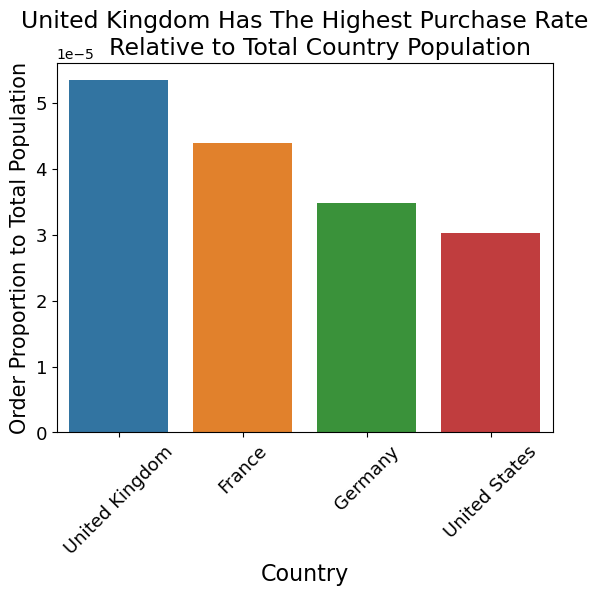

In [42]:
show_plot_8(train_clus)

In [43]:
train_clus.head(1)

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,unit_price,cost,revenue,profit,clusters
31768,2015-12-25,2015,December,22,F,United States,California,Accessories,Tires and Tubes,1,175.0,191.0,175.0,191.0,16.0,0


In [44]:
plot_a = train_clus.groupby('sub_category').sum().sort_values('revenue')
plot_b = train_clus.groupby('sub_category').sum().sort_values('profit')

In [45]:
subcategory_profit = df.groupby('sub_category')['profit'].sum()
subcategory_revenue = df.groupby('sub_category')['revenue'].sum()

rev_profit = pd.concat([subcategory_profit, subcategory_revenue], axis=1)
rev_profit.sort_values('profit', ascending=False).head()

,profit,revenue
sub_category,,
Helmets,518475.0,2738210.0
Tires and Tubes,512124.0,2865915.0
Jerseys,300876.0,1834110.0
Mountain Bikes,144627.0,5176456.0
Bottles and Cages,129567.0,709407.0


In [46]:
# Set the Seaborn style to “darkgrid” for better visual contrast and readability
sns.set_style("darkgrid")
# Set the Matplotlib style to “dark_background” for a visually appealing dark theme
plt.style.use("dark_background") 

In [47]:
def visualize_subcategory_profit_revenue(df):
    """
    Create a visualization of sub-category profits and revenue.

    Parameters:
        df (pandas.DataFrame): Input DataFrame with 'sub_category', 'profit', and 'revenue' columns.

    Returns:
        None
    """
    # 
    subcategory_profit = df.groupby('sub_category')['profit'].sum()
    subcategory_revenue = df.groupby('sub_category')['revenue'].sum()
    
    rev_profit = pd.concat([subcategory_profit, subcategory_revenue], axis=1)
    rev_profit = rev_profit.sort_values('revenue').tail()
    # Create bar plots for sub-category profits and revenue
#     plt.figure(figsize=(10, 14))
    rev_profit.plot(kind='barh', stacked=True)
    plt.ylabel('Sub-Category', size=15)
    plt.xlabel('Revenue / Profit Generated (Mil $)', size =15)
    plt.title('Mountatain Bikes Generate the Most Revenue \n\
But Helmets Generate the Most Profit', size=17)
    plt.xticks(ticks=[250_000, 500_000,1_000_000, 1_500_000, 
                      2_000_000, 2_500_000, 3_000_000],
               labels=[0.25, .5, 1, 1.5, 2, 2.5, 3],
               size=14)
    plt.yticks(size=14)
    
    plt.tight_layout()
    plt.show()

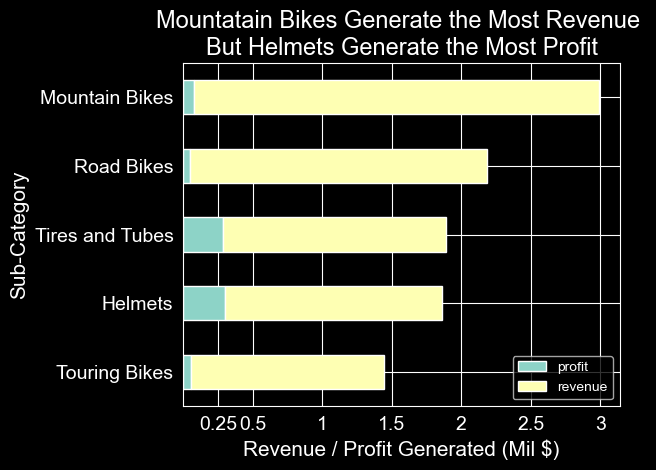

In [48]:
visualize_subcategory_profit_revenue(train_clus)

In [61]:
import product_recommend as p
import explore as e

from wordcloud import WordCloud

In [50]:
clus_0_recs = p.get_cluster_product_rec(0)
clus_1_recs = p.get_cluster_product_rec(1)
clus_2_recs = p.get_cluster_product_rec(2)
clus_3_recs = p.get_cluster_product_rec(3)

# Calls the split_series_words function from the explore module to create a series
# that contains all the words used in each cluster's product description

clus_0_words = e.split_series_words(clus_0_recs, 'name')
clus_1_words = e.split_series_words(clus_1_recs, 'name')
clus_2_words = e.split_series_words(clus_2_recs, 'name')
clus_3_words = e.split_series_words(clus_3_recs, 'name')

Opening local amazon_cycling.csv file
Opening local amazon_cycling.csv file
Opening local amazon_cycling.csv file
Opening local amazon_cycling.csv file


In [62]:
def product_rec_wordcloud(cluster_words_series, cluster_name):

    img = WordCloud(background_color='White', colormap='Set2'
         ).generate(' '.join(cluster_words_series))
    
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Words Used in {cluster_name}', size=17)
    plt.show()

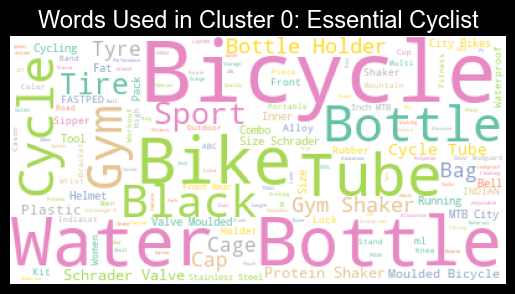

In [63]:
# Visualizing the product words by cluster

# For Cluster 0, we know that the sub-categories most purchased include 
# all three types of bikes, hydration packs, anf fenders

product_rec_wordcloud(clus_0_words, cluster_name='Cluster 0: Essential Cyclist')

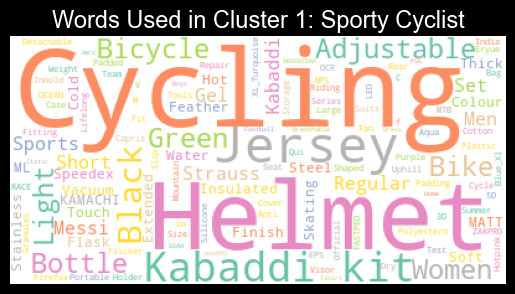

In [64]:
product_rec_wordcloud(clus_1_words, cluster_name='Cluster 1: Sporty Cyclist')

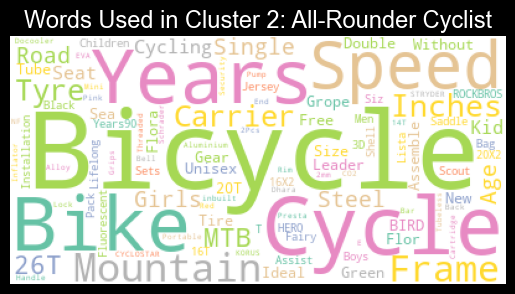

In [65]:
product_rec_wordcloud(clus_2_words, cluster_name='Cluster 2: All-Rounder Cyclist')

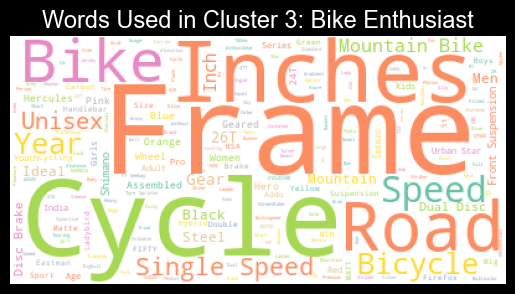

In [66]:
product_rec_wordcloud(clus_3_words, cluster_name='Cluster 3: Bike Enthusiast')